<a href="https://colab.research.google.com/github/lpastor75/digit_recognizer/blob/main/digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><font color="#113D68" size=5>Learn computer vision fundamentals with the famous MNIST data</font></h1>



<h1><font color="#113D68" size=6>Digit recognizer</font></h1>

<br>
<div style="text-align: right">
  <font color="#113D68" size=3>Luis Pastor Nuevo</font><br>
  <font color="#113D68" size=3>Kaggle comnpetitions</font><br>

# Descripción de la competición.

MNIST ("Instituto Nacional de Estándares y Tecnología Modificado") puede ser considerado como el "hola mundo" de la visión artificial. Desde su lanzamiento en 1999, este conjunto de datos clásico de imágenes escritas a mano ha servido como base para comparar algoritmos de clasificación. A medida que surgen nuevas técnicas de aprendizaje automático, MNIST sigue siendo un recurso confiable tanto para investigadores como para estudiantes.

En esta competición, el objetivo es identificar correctamente los dígitos de un conjunto de datos de decenas de miles de imágenes escritas a mano. Es recomendable experimentar con diferentes algoritmos para aprender de primera mano qué funciona bien y cómo se comparan las técnicas.

Se puede acceder a esta competición a través del siguiente enlace: https://www.kaggle.com/competitions/digit-recognizer

## El dataset de MNIST.

- Los archivos de datos train.csv y test.csv contienen imágenes en escala de grises de dígitos dibujados a mano, del 0 al 9.

- Cada imagen tiene 28 píxeles de alto y 28 píxeles de ancho, para un total de 784 píxeles. Cada píxel tiene un único valor de píxel asociado, que indica la claridad u oscuridad de ese píxel, donde los números más altos significan más oscuro. Este valor de píxel es un número entero entre 0 y 255, ambos inclusive.

- El conjunto de datos de entrenamiento (train.csv) tiene 785 columnas. La primera columna, llamada "etiqueta", es el dígito que dibujó el usuario. El resto de las columnas contienen los valores de píxel de la imagen asociada.

- Cada columna de píxeles en el conjunto de entrenamiento tiene un nombre como *pixelx*, donde x es un número entero entre 0 y 783, inclusive. Para ubicar este píxel en la imagen, supongamos que hemos descompuesto x como x = i * 28 + j, donde i y j son números enteros entre 0 y 27, ambos inclusive. Luego, *pixelx* se ubica en la fila i y la columna j de una matriz de 28 x 28 (indexación por cero).

Por ejemplo, *pixel31* indica el píxel que está en la cuarta columna desde la izquierda y la segunda fila desde arriba.


## Carga de datos.
Para empezar, se carga el conjunto de datos de entrenamiento.

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Se establece una semilla para numpy y tensorflow, para poder reproducir la ejecución y los resultados.
seed = 101
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
df_train = pd.read_csv('data/train.csv.zip')
print(f'Dimensión de df_train: {df_train.shape}')
df_train.head()

Dimensión de df_train: (42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Se carga el conjunto de test.

In [3]:
df_test = pd.read_csv('data/test.csv.zip')
print(f'Dimensión de df_test: {df_test.shape}')
df_test.head()

Dimensión de df_test: (28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Se separa la columna con las etiquetas ('label') de las columnas con los datos de los pixeles. Se crea y_train, que es precísamente esa columna.

In [4]:
y_train = df_train['label']
y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [5]:
y_train.shape

(42000,)

In [6]:
x_train = df_train.iloc[:, 1:]
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
x_train.shape

(42000, 784)

Se va a mostrar una pequeña muestra de las imágenes:

In [8]:
# Código para mostrar imágenes
def show_images(images, gray=True):
    fig=plt.figure(figsize=(8, 8))
    index = np.random.randint(len(images), size=100)
    for i in range(100):
        fig.add_subplot(10, 10, i+1)
        plt.axis('off')
        if gray:
            color = 'gray'
        else:
            color = None
        plt.imshow(images.iloc[index[i]].values.reshape([28, 28]), cmap=color)
    plt.show()

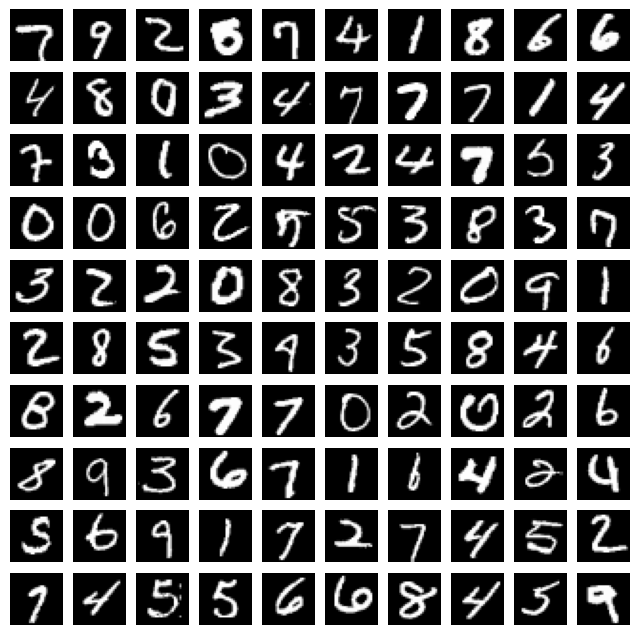

In [9]:
show_images(x_train)

Se convierten los dataframes en arrays numpy, que son más adecuados para operaciones numéricas y científicas.

In [10]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(df_test)

In [11]:
print(f"El tipo de datos de x_train es '{type(x_train).__name__}'")
print(f"El tipo de datos de y_train es '{type(y_train).__name__}'")
print(f"El tipo de datos de x_test es '{type(x_test).__name__}'")

El tipo de datos de x_train es 'ndarray'
El tipo de datos de y_train es 'ndarray'
El tipo de datos de x_test es 'ndarray'


> **Nota**: al ser los valores entre el 0 y el 255, para que el resultado del entrenamiento sea más óptimo es preferible **normalizar** estos valores entre 0 y 1. Se puede realizar de la siguiente forma:

In [12]:
# ejemplo de valores de imagen sin normalizar
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [13]:
# Se normalizan los conjuntos de train y test
x_train = x_train / 255.0
x_test = x_test / 255.0

In [14]:
# ejemplo de valores de imagen después de normalizar
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Construcción de la red

Se definirá una red con capas convolucionales y _full connected_ como la mostrada en la imagen. La arquitectura de la red será la siguiente:

* **Datos de entrada**: imágenes de dimensiones 28x28 pixeles.
* **Datos de salida**: salida de dimensión 10 por cada categoría, donde cada valor será la probabilidad de dicho número.
* **Capa convolucional con pooling**:
    - La capa convolucional se definirá con 32 kernels, con un filtro de 5x5, el padding con relleno y con función de activación _ReLU_.
    - La capa pooling se definirá con un subsampling de 2.
* **Capa full connected**: tendrá 2 capas ocultas.
    - 1º capa con 20 neuronas con función de activación _ReLU_.
    - 2º capa de salida con 10 neuronas y función de activación _Softmax_.

<br>
<div align="center">
<img src="https://drive.google.com/uc?id=1fYcU_Djsz8szGH7D-3YnQi59YHigHm2e" width="800">
</div>
<br>

In [15]:
model = tf.keras.models.Sequential()

Para definir una capa convolucional se usará la capa `Conv2D`, que tiene los siguientes argumentos que se pueden definir:

- `filters`: Número de kernels en la capa convolucional.
- `kernel_size`: Entero, tupla o lista de 2 enteros que define el tamaño del filtro.
- `strides`: Entero, tupla o lista de 2 enteros con el desplazamiento del filtro.
- `padding`: Tipo de relleno, puede tomar los valores _"valid"_ (sin relleno) o _"same"_ (con relleno).
- `activation`: Función de activación.

Para ver más información de esta capa se puede consultar el siguiente enlace: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

Según la red que se quiere definir, se tienen los siguientes parámetros:

- `filters`: 32, ya que se pretende tener 32 filtros.
- `kernel_size`: (5, 5), el tamaño del kernel será 5x5.
- `padding`: _same_, ya que se desea usar relleno.
- `activation`: _relu_ , con función de activación _ReLU_

Además, se deben añadir un parámetros para indicar el tamaño de entrada de la red (tamaño de las imágenes). Este parámetro es:

- `input_shape`: (28, 28, 1), ya que las imágenes son de tamaño 28x28 con un valor por pixel (las imágenes a color tienen 3 valores RGB).

In [16]:
model.add(tf.keras.layers.Conv2D(filters=32,
                                 kernel_size=(5, 5),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(28,28,1)
                                 ))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
Total params: 832
Trainable params: 832
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2),
                                    strides=(2, 2),
                                    padding="same")
                                    )

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
Total params: 832
Trainable params: 832
Non-trainable params: 0
_________________________________________________________________


A continuación se añadirán las capas _full connected_ . Para pasar de una capa convolucional a una capa _full connected_ es necesario aplanar las dimensiones con una capa `Flatten`:

In [20]:
model.add(tf.keras.layers.Flatten())

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
Total params: 832
Trainable params: 832
Non-trainable params: 0
_________________________________________________________________


Los 6.272 parámetros vienen de multiplicar 14x14x32 de la capa anterior.

Una vez que se tienen los parámetros aplanados, se pueden añadir algunas capas densas, una primera capa con 20 neuronas y una capa de salida con 10 neuronas:

In [22]:
model.add(tf.keras.layers.Dense(20, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 20)                125460    
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
Total params: 126,502
Trainable params: 126,502
Non-trainable params: 0
__________________________________________________

<a id="section1.4"></a>
# <font color="#004D7F" size=4>Entrenamiento</font>
Una vez que ya se dispone de la red definida, se procede a configurar el entrenamiento. En la configuración se definirán:

- `optimizer`: se usará el optimizador `adam` con un `learning rate` de 0.001.
- `loss`: se usará como función de coste *Sparse Categorical Crossentropy*, ya que es un problema de clasificación y la salida está con etiquetas del 0 al 9.
- `metrics`: precision.
- `batch_size`: se establecerá un tamaño de *batch* de 32.
- `epochs`: se establecerá el número de *epochs* en 10.

In [24]:
# Se define el optimizador cambiando el factor de entrenamiento
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# Se compila el modelo
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Para entrenar, es necesario cambiar la dimensión de los datos de `(42000,28,28)` a `(42000,28,28,1)`, añadiendo una dimensión más que será el valor del pixel en blanco y negro. También habrá que hacerlo para los datos de test. Para ello se usará la función de los *numpy arrays* llamada `reshape` donde se le pasa cada una de las dimensiones en las que se quiere redimensionar el *array*. Los cambios que efectuados serán:

- Imágenes de entrada de entrenamiento `(42000,28,28)` a `(42000,28,28,1)`.
- Salida de entrenamiento `(42000)` a `(42000,1)`.
- Imágenes de entrada de test `(28000,28,28)` a `(28000,28,28,1)`.

In [25]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_train.shape

(42000, 28, 28, 1)

In [26]:
y_train = y_train.reshape(y_train.shape[0], 1)
y_train.shape

(42000, 1)

In [27]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_test .shape

(28000, 28, 28, 1)

Con train_test_split se dividen los datos en conjunto de entrenamiento y en conjunto de validación

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=42)

Una vez redimensionados los datos y separados en conjunto de entremaniento y conjunto de validación, se procede a entrenar:

In [29]:
hist = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=10, batch_size=32)

Epoch 1/10
1050/1050 [==============================] - 15s 5ms/step - loss: 0.2662 - accuracy: 0.9226 - val_loss: 0.1115 - val_accuracy: 0.9693
Epoch 2/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0878 - accuracy: 0.9736 - val_loss: 0.0809 - val_accuracy: 0.9764
Epoch 3/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0590 - accuracy: 0.9821 - val_loss: 0.0690 - val_accuracy: 0.9798
Epoch 4/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0449 - accuracy: 0.9855 - val_loss: 0.0682 - val_accuracy: 0.9790
Epoch 5/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0364 - accuracy: 0.9882 - val_loss: 0.0606 - val_accuracy: 0.9812
Epoch 6/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0274 - accuracy: 0.9917 - val_loss: 0.0623 - val_accuracy: 0.9838
Epoch 7/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0247 - accuracy: 0.9921 - val_loss: 0.0570 - val_accuracy

<a id="section1.5"></a>
# <font color="#004D7F" size=4>Evaluación del modelo</font>

A continuación, se evalúa cómo de bien funciona el modelo, visualizando el error y la precisión.

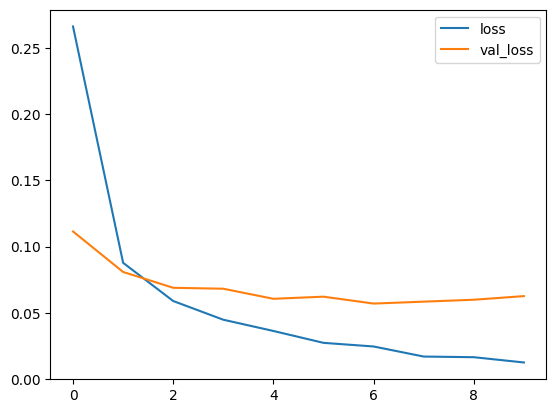

In [30]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()

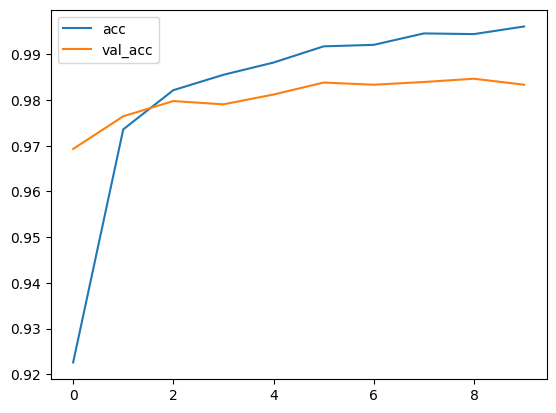

In [31]:
plt.plot(hist.history['accuracy'], label='acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
plt.legend()

## <font color="#004D7F">Ajuste de modelos</font>

Después de esta pequeña prueba, a modo de introducción, se va a analizar en profundidad el problema de MNIST y a tratar de mejorar los resultados obtenidos con este primer modelo. Para ello se van a seguir siempre los mismos pasos, que se detallan a continuación.

### <font color="#004D7F">1. Elegir una estructura de red base</font>

Lo primero que se debe hacer es utilizar una estructura conocida. Se va a comenzar com un modelo de redes convolucionales, con 2 capas de convolución y 3 full-conected, tratando posteriormente de mejorar su rendimiento. Se creará una función que, al ser invocada, devuelva el modelo deseado.

In [32]:
# se define la función que creará la red

def basic_model ():

    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(28,28,1)),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),
        tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")
        ])
    return model

model = basic_model()

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

### <font color="#004D7F">2. Se establece una función de loss adecuada al problema.</font>
En este caso, como es un problema multiclase, se selecciona la categorical crossentropy.

In [33]:
actual_loss = 'sparse_categorical_crossentropy'

### <font color="#004D7F">3. Overfitting sobre un pequeño conjunto de datos.</font>

Este paso se suele realizar para comprobar que la estructura de la red es correcta y que el modelo aprende para los datos proporcionados. En `tf.keras`, para poder realizar esta prueba sencilla es necesario establecer el optimizer, por lo que se va a usar *Adam* con un `learning_rate=0.001` ya que siempre es una buena solución.

In [35]:
# se define el optimizador
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# se compila el modelo
model.compile(optimizer=opt,
              loss= actual_loss,
              metrics=['accuracy'])

In [36]:
# se entrena el modelo con las 1000 primeras imágenes del conjunto de entrenamiento, con unas cuantas epochs. Como son pocas imágenes el proceso es rápido.
hist = model.fit(X_train[0:1000], Y_train[0:1000], epochs=20)

Epoch 1/20
32/32 [==============================] - 2s 8ms/step - loss: 1.6041 - accuracy: 0.4690
Epoch 2/20
32/32 [==============================] - 0s 4ms/step - loss: 0.5439 - accuracy: 0.8220
Epoch 3/20
32/32 [==============================] - 0s 4ms/step - loss: 0.3592 - accuracy: 0.8890
Epoch 4/20
32/32 [==============================] - 0s 4ms/step - loss: 0.2187 - accuracy: 0.9310
Epoch 5/20
32/32 [==============================] - 0s 4ms/step - loss: 0.1580 - accuracy: 0.9530
Epoch 6/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0981 - accuracy: 0.9720
Epoch 7/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0803 - accuracy: 0.9810
Epoch 8/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0382 - accuracy: 0.9930
Epoch 9/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0409 - accuracy: 0.9890
Epoch 10/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0228 - accuracy: 0.9960
Epoch 11/20
32/32 [

Una vez comprobado que todo funciona correctamente, se va a comenzar a ajustar de verdad los parámetros para mejorar el modelo.

### <font color="#004D7F">4. Elección de un optimizer.</font>

Ya se ha establecido Adam, y parece que el learning rate puede ser adecuado. Se procede a comprobar.

<div class="alert alert-block alert-info">
    
> <i class="fa fa-info-circle" aria-hidden="true"></i> <font color="#31708f">**IMPORTANTE**
>
> Es necesario reiniciar la red, ya que si ahora se vuelve a hacer fit, entrenaría a partir de lo aprendido en la celda anterior y está sobreajustada a los casos reducidos, por lo que hay que reiniciar los pesos.
</font>
</div>


In [37]:
# re-definición de la red
model = basic_model()

# definición del optimizador
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# se compila el modelo
model.compile(optimizer=opt,
              loss= actual_loss,
              metrics=['accuracy'])


In [38]:
# Ahora el proceso va a ser más lento, por lo que se va a probar con 5 epochs
# Y, ahora si, se puede empezar a validar

hist = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=5)

Epoch 1/5
1050/1050 [==============================] - 8s 5ms/step - loss: 0.1791 - accuracy: 0.9448 - val_loss: 0.0737 - val_accuracy: 0.9773
Epoch 2/5
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0577 - accuracy: 0.9817 - val_loss: 0.0635 - val_accuracy: 0.9796
Epoch 3/5
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0380 - accuracy: 0.9875 - val_loss: 0.0448 - val_accuracy: 0.9867
Epoch 4/5
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0286 - accuracy: 0.9911 - val_loss: 0.0403 - val_accuracy: 0.9877
Epoch 5/5
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0220 - accuracy: 0.9924 - val_loss: 0.0362 - val_accuracy: 0.9881


Efectivamente, parece que todo funciona correctamente. EL loss baja en ambos casos y el accuracy aumenta.

<div class="alert alert-block alert-info">
    
> <i class="fa fa-info-circle" aria-hidden="true"></i> <font color="#31708f">**IMPORTANTE**</font>
>
> <font color="#31708f">En tf.keras, la loss y las métricas del conjunto de entrenamiento se obtienen de la media de los resultados de cada batch, por lo que en las primeras epochs esto afecta significativamente a los resultados mostrados, ya que el primer batch de las epochs iniciales va a dar resultados mucho peores que los últimos.</font>
>
><font color="#31708f">Por eso hay que tener cuidado cuando se analicen las primeras epochs frente al conjunto de validación, siendo normal que este segundo genere mejores resultados en los primeros pasos del entrenamiento. Esto solo es algo del proceso de obtención de los resultados de tf.keras. La práctica correcta sería procesar todo el conjunto de entrenamiento una vez terminada la epoch.
</font>
</div>


In [39]:
# se re-define la red
model = basic_model()

# definimos el optimizador
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# compilamos el modelo
model.compile(optimizer=opt,
              loss= actual_loss,
              metrics=['accuracy'])


In [40]:
# Como antes, el proceso va a ser más lento, por lo que se va a probar con 5 epochs

hist = model.fit(X_train, Y_train, validation_data=(x_train, y_train), epochs=5)

Epoch 1/5
1050/1050 [==============================] - 13s 10ms/step - loss: 0.1874 - accuracy: 0.9435 - val_loss: 0.0615 - val_accuracy: 0.9811
Epoch 2/5
1050/1050 [==============================] - 7s 6ms/step - loss: 0.0562 - accuracy: 0.9827 - val_loss: 0.0510 - val_accuracy: 0.9838
Epoch 3/5
1050/1050 [==============================] - 10s 9ms/step - loss: 0.0388 - accuracy: 0.9868 - val_loss: 0.0264 - val_accuracy: 0.9914
Epoch 4/5
1050/1050 [==============================] - 9s 9ms/step - loss: 0.0287 - accuracy: 0.9907 - val_loss: 0.0252 - val_accuracy: 0.9921
Epoch 5/5
1050/1050 [==============================] - 11s 10ms/step - loss: 0.0217 - accuracy: 0.9932 - val_loss: 0.0221 - val_accuracy: 0.9928


<div class="alert alert-block alert-info">
    
> <font color="#31708f">
> Este es un proceso que no se suele realizar, ya que el procesamiento de la base de datos de entrenamiento suele ser costosa, dado que tiene que ser muy grande. Además, es algo que solo afecta significativamente a los resultados de las primeras epochs. Pero hay que tenerlo en cuenta a la hora de analizar los resultados.
</font>
</div>

### <font color="#004D7F">5. Probar diferentes configuraciones con un número pequeño de epochs.</font>

Se comenzará, por ejemplo, con el tamaño de batch, poniendo los valores standard, que suelen ser 16, 32 o 64, aunque, como siempre, dependen del problema. Ya se ha probado con 32, que es el valor por defecto cuando no se especifica.

#### Experimento 1
- batch_size = 16

Esta vez, además, se van a mostrar la comparativa en forma de gráfica de los resultados obtenidos tanto en entrenamiento como en validación. Para ello se definirá una función que muestre esa comparativa.

In [41]:
# función para mostrar los resultados

def show_results(hist):
    fig=plt.figure(figsize=(60, 40))

    # error
    fig.add_subplot(10, 10, 1)
    plt.title('Loss')
    plt.plot(hist.history['loss'], label='train')
    plt.plot(hist.history['val_loss'], label='val')
    plt.legend()

    # precision
    fig.add_subplot(10, 10, 2)
    plt.title('Accuracy')
    plt.plot(hist.history['accuracy'], label='train')
    plt.plot(hist.history['val_accuracy'], label='val')
    plt.legend()

    plt.legend()
    plt.show()

In [42]:
# se re-define la red
model = basic_model()

# se define el optimizador
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# se compila el modelo
model.compile(optimizer=opt,
              loss= actual_loss,
              metrics=['accuracy'])

In [43]:
# Como se comentó anteriormente, el proceso va a ser lento, por lo que sólo se va a probar con unas 20 epochs, con un tamaño de batch de 16
# se utiliza la validación

hist = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=16, epochs=20)

Epoch 1/20
2100/2100 [==============================] - 12s 5ms/step - loss: 0.1594 - accuracy: 0.9503 - val_loss: 0.0892 - val_accuracy: 0.9710
Epoch 2/20
2100/2100 [==============================] - 10s 5ms/step - loss: 0.0521 - accuracy: 0.9840 - val_loss: 0.0714 - val_accuracy: 0.9805
Epoch 3/20
2100/2100 [==============================] - 10s 5ms/step - loss: 0.0357 - accuracy: 0.9882 - val_loss: 0.0535 - val_accuracy: 0.9848
Epoch 4/20
2100/2100 [==============================] - 10s 5ms/step - loss: 0.0264 - accuracy: 0.9913 - val_loss: 0.0440 - val_accuracy: 0.9874
Epoch 5/20
2100/2100 [==============================] - 10s 5ms/step - loss: 0.0210 - accuracy: 0.9926 - val_loss: 0.0520 - val_accuracy: 0.9852
Epoch 6/20
2100/2100 [==============================] - 10s 5ms/step - loss: 0.0141 - accuracy: 0.9950 - val_loss: 0.0627 - val_accuracy: 0.9845
Epoch 7/20
2100/2100 [==============================] - 9s 4ms/step - loss: 0.0147 - accuracy: 0.9956 - val_loss: 0.0436 - val_acc

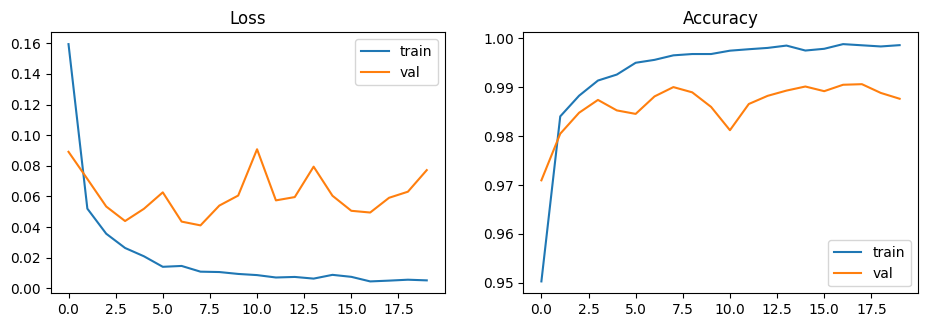

In [44]:
show_results(hist)

#### Experimento 2
- batch_size = 64

In [45]:
# se re-define la red
model = basic_model()

# se define el optimizador
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# se compila el modelo
model.compile(optimizer=opt,
              loss= actual_loss,
              metrics=['accuracy'])

In [46]:
# Se va a probar con unas 20 epochs
# Se realizará validación

hist = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=64, epochs=20)

Epoch 1/20
525/525 [==============================] - 5s 5ms/step - loss: 0.2215 - accuracy: 0.9332 - val_loss: 0.0865 - val_accuracy: 0.9731
Epoch 2/20
525/525 [==============================] - 2s 5ms/step - loss: 0.0620 - accuracy: 0.9814 - val_loss: 0.0588 - val_accuracy: 0.9824
Epoch 3/20
525/525 [==============================] - 3s 7ms/step - loss: 0.0399 - accuracy: 0.9873 - val_loss: 0.0480 - val_accuracy: 0.9840
Epoch 4/20
525/525 [==============================] - 2s 5ms/step - loss: 0.0290 - accuracy: 0.9904 - val_loss: 0.0471 - val_accuracy: 0.9861
Epoch 5/20
525/525 [==============================] - 2s 5ms/step - loss: 0.0222 - accuracy: 0.9924 - val_loss: 0.0405 - val_accuracy: 0.9870
Epoch 6/20
525/525 [==============================] - 2s 5ms/step - loss: 0.0174 - accuracy: 0.9944 - val_loss: 0.0504 - val_accuracy: 0.9850
Epoch 7/20
525/525 [==============================] - 3s 5ms/step - loss: 0.0146 - accuracy: 0.9953 - val_loss: 0.0360 - val_accuracy: 0.9892
Epoch 

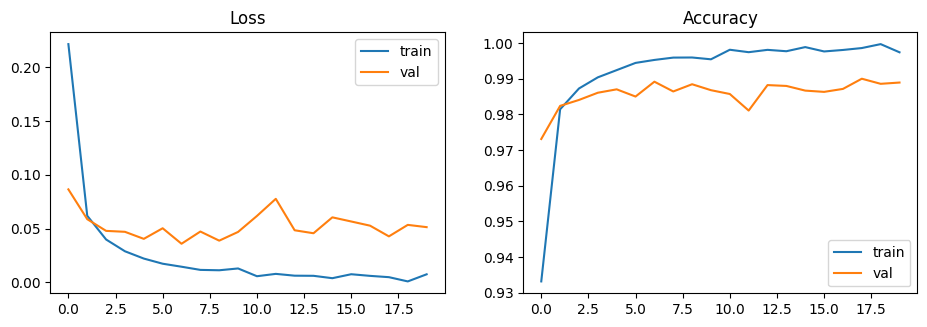

In [47]:
show_results(hist)

Parece que lo que mejor para el entrenamiento es un batch_size de 16, aunque no se puede descartar el de 32, ya que da mejor resultado en validación. Por eso, se va a probar ahora con una modificación del valor del learning rate, dejando el batch_size en 32, pero no se descartará el de 16 para pruebas posteriores.

#### Experimento 3
- batch_size = 32
- learning_rate = 0.005

In [48]:
# se re-define la red
model = basic_model()

# se define el optimizador
opt = tf.keras.optimizers.Adam(learning_rate=0.005)

# se compila el modelo
model.compile(optimizer=opt,
              loss= actual_loss,
              metrics=['accuracy'])

In [49]:
# Se prueba con unas 20 epochs

hist = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=20)

Epoch 1/20
1050/1050 [==============================] - 8s 5ms/step - loss: 0.1490 - accuracy: 0.9563 - val_loss: 0.1005 - val_accuracy: 0.9710
Epoch 2/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0722 - accuracy: 0.9790 - val_loss: 0.0943 - val_accuracy: 0.9723
Epoch 3/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0517 - accuracy: 0.9846 - val_loss: 0.0602 - val_accuracy: 0.9829
Epoch 4/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0502 - accuracy: 0.9863 - val_loss: 0.0763 - val_accuracy: 0.9789
Epoch 5/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0430 - accuracy: 0.9880 - val_loss: 0.0568 - val_accuracy: 0.9862
Epoch 6/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0356 - accuracy: 0.9902 - val_loss: 0.0866 - val_accuracy: 0.9798
Epoch 7/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0319 - accuracy: 0.9919 - val_loss: 0.0793 - val_accuracy:

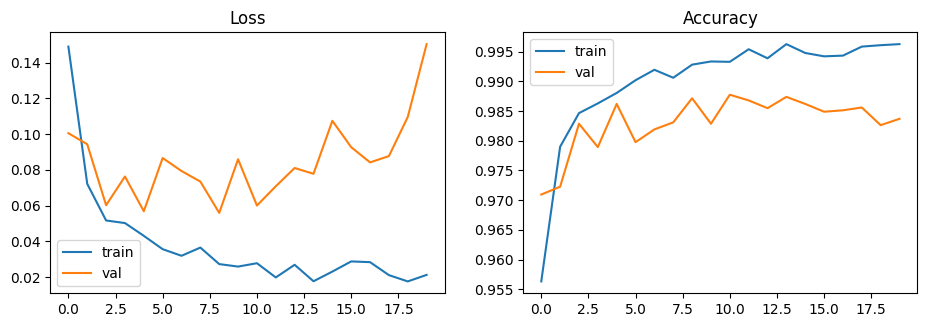

In [50]:
show_results(hist)

Parece que no ha funcionado todo lo bien que debería, el learning rate es demasiado alto, por eso aparecen esos saltos y oscilaciones tan grandes.Se probará bajando un poco el valor.


#### Experimento 4
- batch_size = 32
- learning_rate = 0.0005

In [51]:
# se re-define la red
model = basic_model()

# se define el optimizador
opt = tf.keras.optimizers.Adam(learning_rate=0.0005)

# se compila el modelo
model.compile(optimizer=opt,
              loss= actual_loss,
              metrics=['accuracy'])

In [52]:
# Se prueba con unas 20 epochs

hist = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=20)

Epoch 1/20
1050/1050 [==============================] - 8s 5ms/step - loss: 0.2408 - accuracy: 0.9276 - val_loss: 0.0882 - val_accuracy: 0.9736
Epoch 2/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0684 - accuracy: 0.9791 - val_loss: 0.0833 - val_accuracy: 0.9739
Epoch 3/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0481 - accuracy: 0.9852 - val_loss: 0.0456 - val_accuracy: 0.9850
Epoch 4/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0364 - accuracy: 0.9886 - val_loss: 0.0404 - val_accuracy: 0.9858
Epoch 5/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0273 - accuracy: 0.9914 - val_loss: 0.0414 - val_accuracy: 0.9877
Epoch 6/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0204 - accuracy: 0.9935 - val_loss: 0.0497 - val_accuracy: 0.9838
Epoch 7/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0192 - accuracy: 0.9938 - val_loss: 0.0398 - val_accuracy:

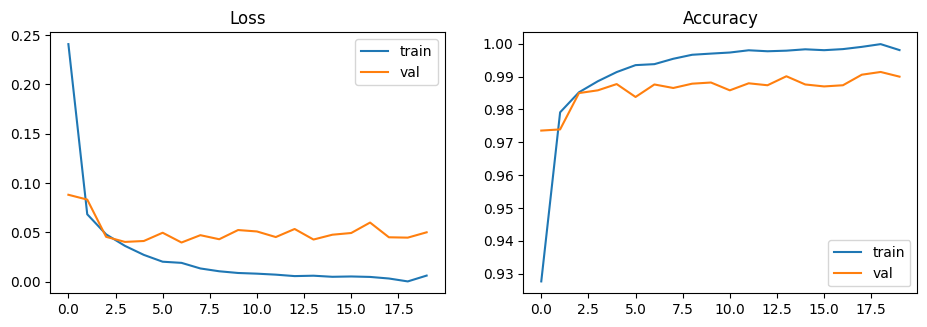

In [53]:
show_results(hist)

Este valor ha funcionado algo mejor, aunque el mejor valor para el learning rate parece ser 0.001. Todo un acierto empezar con dicho valor.


Antes de terminar con esto, se va a hacer una última prueba donde se va a incluir el batch normalization en la red.

#### Experimento 5
- batch_size = 32
- learning_rate = 0.001
- BatchNormalization

In [54]:
# hay que hacerlo antes de la activación,
# por lo que hay que quitar el parámetro de la capa conv y dense

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding="same", input_shape=(28,28,1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),

    tf.keras.layers.Conv2D(64, (3, 3), padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(10, activation="softmax")
])

# se define el optimizador
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# se compila el modelo
model.compile(optimizer=opt,
              loss= actual_loss,
              metrics=['accuracy'])

In [55]:
# Se prueba con unas 20 epochs

hist = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=20)

Epoch 1/20
1050/1050 [==============================] - 10s 7ms/step - loss: 0.1509 - accuracy: 0.9607 - val_loss: 0.0562 - val_accuracy: 0.9843
Epoch 2/20
1050/1050 [==============================] - 7s 7ms/step - loss: 0.0565 - accuracy: 0.9831 - val_loss: 0.0404 - val_accuracy: 0.9873
Epoch 3/20
1050/1050 [==============================] - 8s 8ms/step - loss: 0.0397 - accuracy: 0.9879 - val_loss: 0.0366 - val_accuracy: 0.9892
Epoch 4/20
1050/1050 [==============================] - 7s 7ms/step - loss: 0.0305 - accuracy: 0.9905 - val_loss: 0.0579 - val_accuracy: 0.9827
Epoch 5/20
1050/1050 [==============================] - 7s 6ms/step - loss: 0.0263 - accuracy: 0.9915 - val_loss: 0.0436 - val_accuracy: 0.9867
Epoch 6/20
1050/1050 [==============================] - 7s 7ms/step - loss: 0.0175 - accuracy: 0.9942 - val_loss: 0.0381 - val_accuracy: 0.9880
Epoch 7/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0186 - accuracy: 0.9939 - val_loss: 0.0319 - val_accuracy

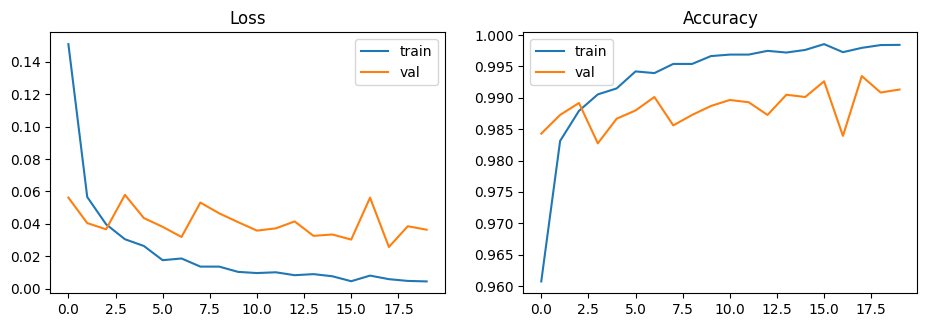

In [56]:
show_results(hist)

Se aprecia algo de sobreajuste. Se va a probar a eliminar dicho sobreajuste añadiendo dropout.

#### Experimento 6
- batch_size = 32
- learning_rate = 0.001
- BatchNormalization
- Dropout = 0.25

In [57]:
# Se tiene que tener en cuenta que hay que hacerlo antes de la activación,
# por lo que hay que quitar el parámetro de la capa conv y dense

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding="same", input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),

    tf.keras.layers.Conv2D(64, (3, 3), padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(10, activation="softmax")
])

# se define el optimizador
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# se compila el modelo
model.compile(optimizer=opt,
              loss= actual_loss,
              metrics=['accuracy'])

In [58]:
hist = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=20)

Epoch 1/20
1050/1050 [==============================] - 9s 6ms/step - loss: 0.3355 - accuracy: 0.8957 - val_loss: 0.0997 - val_accuracy: 0.9729
Epoch 2/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.1217 - accuracy: 0.9640 - val_loss: 0.0820 - val_accuracy: 0.9736
Epoch 3/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0867 - accuracy: 0.9756 - val_loss: 0.0458 - val_accuracy: 0.9852
Epoch 4/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0724 - accuracy: 0.9798 - val_loss: 0.0564 - val_accuracy: 0.9843
Epoch 5/20
1050/1050 [==============================] - 8s 7ms/step - loss: 0.0647 - accuracy: 0.9811 - val_loss: 0.0771 - val_accuracy: 0.9757
Epoch 6/20
1050/1050 [==============================] - 7s 6ms/step - loss: 0.0563 - accuracy: 0.9837 - val_loss: 0.0841 - val_accuracy: 0.9764
Epoch 7/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0480 - accuracy: 0.9865 - val_loss: 0.0373 - val_accuracy:

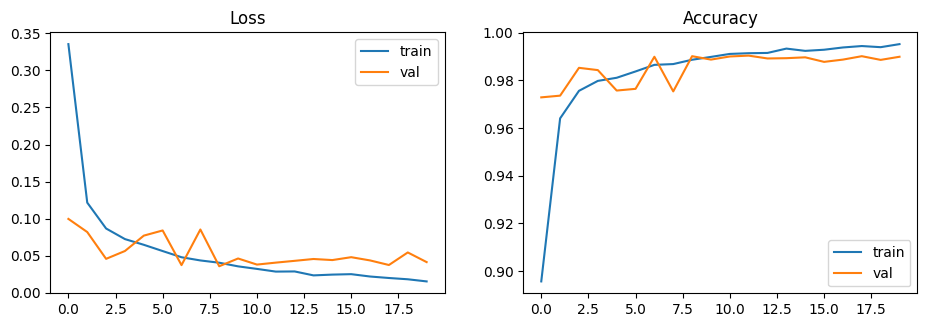

In [59]:
show_results(hist)

Con la siguiente línea de código se guarda este modelo, ya que con él se obtienen buenos resultados. Se consiguió un score de **99.039** en la competición de *Kaggle*.

In [60]:
model.save('my_model_experimento_6.keras')

A continuaión se dejará sólo la capa de *dropout*, eliminando la de *batch* *normalization*.

#### Experimento 7
- batch_size = 32
- learning_rate = 0.001
- Dropout = 0.25

In [61]:
# Hay que hacerlo antes de la activación,
# por lo que hay que quitar el parámetro de la capa conv y dense

model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(10, activation="softmax")
])

# Se define el optimizador
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# Se compila el modelo
model2.compile(optimizer=opt,
              loss= actual_loss,
              metrics=['accuracy'])

In [62]:
hist = model2.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=20)

Epoch 1/20
1050/1050 [==============================] - 7s 5ms/step - loss: 0.2710 - accuracy: 0.9169 - val_loss: 0.0769 - val_accuracy: 0.9780
Epoch 2/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0870 - accuracy: 0.9749 - val_loss: 0.0607 - val_accuracy: 0.9827
Epoch 3/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0601 - accuracy: 0.9816 - val_loss: 0.0387 - val_accuracy: 0.9873
Epoch 4/20
1050/1050 [==============================] - 7s 7ms/step - loss: 0.0479 - accuracy: 0.9862 - val_loss: 0.0379 - val_accuracy: 0.9877
Epoch 5/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0402 - accuracy: 0.9880 - val_loss: 0.0368 - val_accuracy: 0.9892
Epoch 6/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0311 - accuracy: 0.9911 - val_loss: 0.0479 - val_accuracy: 0.9869
Epoch 7/20
1050/1050 [==============================] - 6s 5ms/step - loss: 0.0299 - accuracy: 0.9912 - val_loss: 0.0379 - val_accuracy:

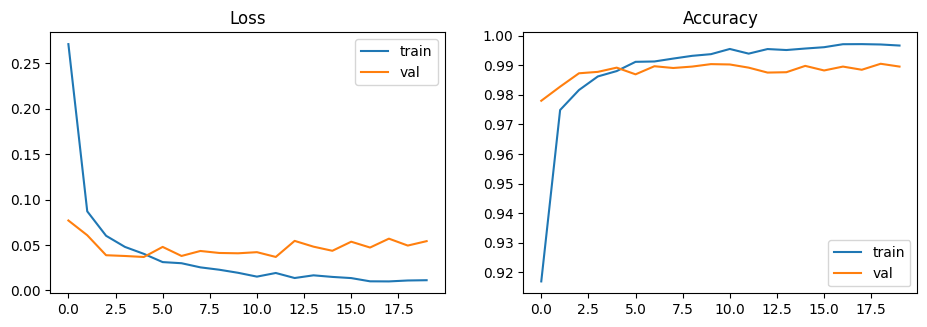

In [63]:
show_results(hist)

Se guardará también este modelo, ya que genera buenos resultados también. Con este modelo se consiguió un score de **98.921** en la competición de *Kaggle*.

In [64]:
model2.save('my_model_experimento_7.keras')

#### Experimento 8
- batch_size = 32
- learning_rate = 0.001
- Dropout = 0.25
- Epochs = 40

In [65]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding="same", input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),

    tf.keras.layers.Conv2D(64, (3, 3), padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(10, activation="softmax")
])

# se define el optimizador
opt = tf.keras.optimizers.Adam(learning_rate=0.0005)

# se compila el modelo
model3.compile(optimizer=opt,
              loss= actual_loss,
              metrics=['accuracy'])

In [66]:
hist = model3.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=40)

Epoch 1/40
1050/1050 [==============================] - 10s 7ms/step - loss: 0.3594 - accuracy: 0.8887 - val_loss: 0.1043 - val_accuracy: 0.9705
Epoch 2/40
1050/1050 [==============================] - 5s 5ms/step - loss: 0.1283 - accuracy: 0.9626 - val_loss: 0.0660 - val_accuracy: 0.9821
Epoch 3/40
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0916 - accuracy: 0.9740 - val_loss: 0.0567 - val_accuracy: 0.9833
Epoch 4/40
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0774 - accuracy: 0.9782 - val_loss: 0.0527 - val_accuracy: 0.9843
Epoch 5/40
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0648 - accuracy: 0.9812 - val_loss: 0.0406 - val_accuracy: 0.9888
Epoch 6/40
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0534 - accuracy: 0.9844 - val_loss: 0.0486 - val_accuracy: 0.9862
Epoch 7/40
1050/1050 [==============================] - 6s 5ms/step - loss: 0.0478 - accuracy: 0.9858 - val_loss: 0.0597 - val_accuracy

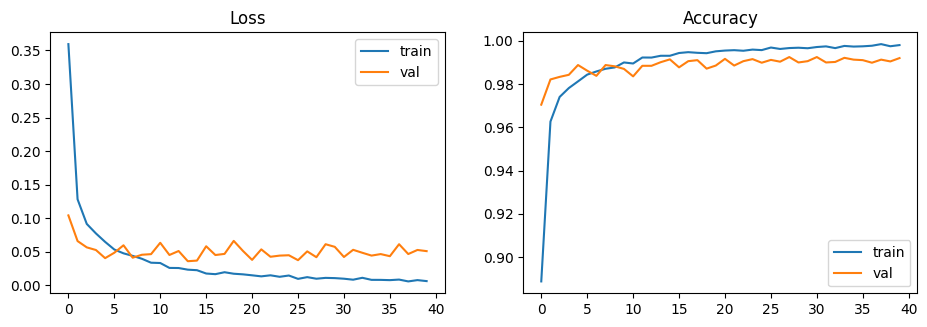

In [67]:
show_results(hist)

Se guardará también este modelo, ya que genera buenos resultados también. Con este modelo se consiguió un score de **98.964** en la competición de *Kaggle*.

In [68]:
model3.save('my_model_experimento_8.keras')

<a id="section1.6"></a>
# <font color="#004D7F" size=4>Predicciones</font>

A continuación se van a realizar las predicciones del conjunto de test.

In [69]:
# predicción del primer elemento del conjunto de test

model.predict(x_test[:1])

1/1 [==============================] - 0s 188ms/step


array([[1.0872281e-19, 9.4901689e-21, 1.0000000e+00, 1.1467002e-19,
        5.3805243e-21, 4.8474354e-29, 1.2987531e-25, 1.6358828e-17,
        6.3614739e-18, 5.9416173e-32]], dtype=float32)

Como se observa, el método predict devuelve un array con el porcentaje de posibilidades de cada una de las 10 etiquetas (números del 0 al 9). Sería cuestión de quedarse con el elemento mayor, que representaría el mayor porcentaje.

Para la primera imagen del conjunto de test, el modelo predice un 2 como etiqueta de la imagen, con un porcentaje del 100 por 100 prácticamente.

A continuación se realiza, con ese mismo modelo, la predicción para las 28000 imágenes del conjunto de test:

In [70]:
test_pred = [p.argmax() for p in model.predict(x_test[:])]

875/875 [==============================] - 2s 3ms/step


In [71]:
# Se carga el dataset que habrá que modificar para subirlo a la competición de Kaggle.

df_sample_submission = pd.read_csv('data/sample_submission.csv')
print(f'Dimensión de df_sample_submission: {df_sample_submission.shape}')
df_sample_submission.head()

Dimensión de df_sample_submission: (28000, 2)


,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [72]:
df_sample_submission['Label'] = test_pred
df_sample_submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


Este es el dataset que se debe subir a Kaggle para que el modelo sea evaluado y aparecer en la clasificación.

Se guarda el dataset para descargarlo en local y subirlo posteriormente a Kaggle:

In [73]:
df_sample_submission.to_csv("submission_ex6.csv", index=False)